In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
%matplotlib inline
import seaborn as sns
sns.set_style("darkgrid")
from sklearn.ensemble import IsolationForest


In [3]:
PATH= os.path.abspath(os.getcwd())
atm= pd.read_csv(PATH + '/atm.csv') 
atm_dataset = atm
atm_dataset['ATM Name'].unique()

full_atm = pd.DataFrame()
full_atm['x1'] = atm_dataset["No Of XYZ Card Withdrawals"]
full_atm['x2'] = atm_dataset["Amount withdrawn XYZ Card"]


In [4]:
# create abnormal data
from tsaug import TimeWarp, Crop, Quantize, Drift, Reverse,AddNoise,Convolve
my_augmenter = (
    TimeWarp() *1  # random time warping 5 times in parallel
    + Quantize(n_levels=[15, 20, 30])  # random quantize to 10-, 20-, or 30- level sets
    + Drift(max_drift=(0.1, 0.4)) @ 0.5  # with 80% probability, random drift the signal up to 10% - 50%
    + Reverse() @ 0.1  # with 50% probability, reverse the sequence
    + AddNoise(scale=(0.01, 0.05)) @ 0.5
    )
my_augmenter2 = (
    TimeWarp() *4
    + Quantize(n_levels=[900, 1500,2000 ])
    + Drift(max_drift=(0.1, 0.8)) @ 0.9  # with 80% probability, random drift the signal up to 10% - 50%
    + AddNoise(scale=(0.8, 0.8)) @ 0.7
    )
my_augmenter3 = (
    TimeWarp() *4
    + Quantize(n_levels=[900, 1500,2000 ])
    + Drift(max_drift=(0.1, 0.8)) @ 0.9  # with 80% probability, random drift the signal up to 10% - 50%
    + AddNoise(scale=(0.8, 0.8)) @ 0.5
    )
    

In [15]:

atm_abnormal_rnd1 = np.random.uniform(low=0, high=full_atm["x1"].max(), size=(len(full_atm), 1))
atm_abnormal_rnd2 = np.random.uniform(low=0, high=full_atm["x2"].max(), size=(len(full_atm), 1))
atm_abnormal_rnd1 = np.array(atm_abnormal_rnd1)
atm_abnormal_rnd2 = np.array(atm_abnormal_rnd2)

atm_abnormal_rnd = np.concatenate([atm_abnormal_rnd1,atm_abnormal_rnd2],axis=1)

atm_abnormal = pd.DataFrame(atm_abnormal_rnd,columns=["x1","x2"])

x_times = np.arange(len(full_atm["x1"]))
x_aug1,y_aug1 = my_augmenter3.augment(x_times,full_atm["x1"].to_numpy())
x_aug2,y_aug2 = my_augmenter3.augment(x_times,full_atm["x2"].to_numpy())



atm_abnormal['x1'] = atm_abnormal['x1']*0.6 +(y_aug1[3]*0.4)

atm_abnormal['x2'] = atm_abnormal['x2']*0.6 +(y_aug2[3]*0.4)


In [26]:
atm_abnormal_y =pd.DataFrame()
atm_abnormal_y['y'] = atm_abnormal['x1']
atm_abnormal_y['y']=-1
atm_abnormal_y2 =pd.DataFrame()
atm_abnormal_y2['y'] = atm_abnormal['x1']
atm_abnormal_y2['y']=0

In [27]:

rnd_idx1 = int(np.random.uniform(low=0, high=100, size=(1, 1)))
rnd_idx2 = int(np.random.uniform(low=60, high=200, size=(1, 1)))
rnd_idx3 = int(np.random.uniform(low=160, high=300, size=(1, 1)))
rnd_idx4 = int(np.random.uniform(low=260, high=400, size=(1, 1)))
rnd_idx5 = int(np.random.uniform(low=360, high=450, size=(1, 1)))

atm_abnormal[rnd_idx1:rnd_idx1+20] = full_atm[rnd_idx1:rnd_idx1+20]
atm_abnormal[rnd_idx2:rnd_idx2+20] = full_atm[rnd_idx2:rnd_idx2+20]
atm_abnormal[rnd_idx3:rnd_idx3+20] = full_atm[rnd_idx3:rnd_idx3+20]
atm_abnormal[rnd_idx4:rnd_idx4+30] = full_atm[rnd_idx4:rnd_idx4+30]
atm_abnormal[rnd_idx5:rnd_idx5+20] = full_atm[rnd_idx5:rnd_idx5+20]

atm_abnormal_y['y'][rnd_idx1:rnd_idx1+20] = 1
atm_abnormal_y['y'][rnd_idx2:rnd_idx2+20] = 1
atm_abnormal_y['y'][rnd_idx3:rnd_idx3+20] = 1
atm_abnormal_y['y'][rnd_idx4:rnd_idx4+30] = 1
atm_abnormal_y['y'][rnd_idx5:rnd_idx5+20] = 1

atm_abnormal_y2['y'][rnd_idx1:rnd_idx1+20] = 1
atm_abnormal_y2['y'][rnd_idx2:rnd_idx2+20] = 1
atm_abnormal_y2['y'][rnd_idx3:rnd_idx3+20] = 1
atm_abnormal_y2['y'][rnd_idx4:rnd_idx4+30] = 1
atm_abnormal_y2['y'][rnd_idx5:rnd_idx5+20] = 1

atm_abnormal_ = atm_abnormal[:500]
atm_abnormal_y_ = atm_abnormal_y[:500]
atm_abnormal_y2_ = atm_abnormal_y2[:500]

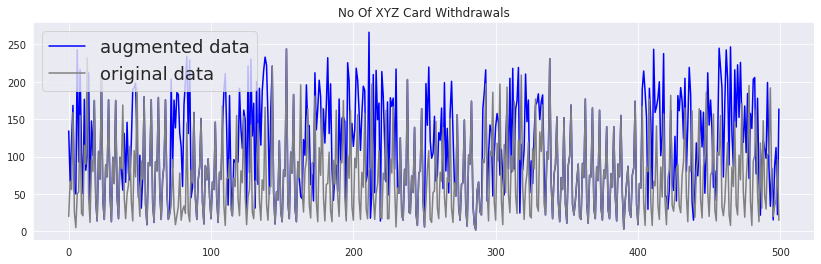

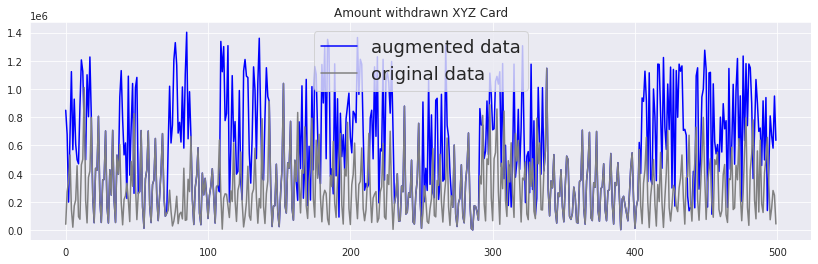

In [22]:

plt.figure(figsize=(14,4))
plt.plot(x_times[:500],atm_abnormal['x1'][:500],color='blue',label = 'augmented data')
plt.plot(x_times[:500],full_atm["x1"][:500],color='grey',label='original data')

plt.title("No Of XYZ Card Withdrawals")
plt.legend(fontsize=18)
plt.savefig(PATH+'/full_atm_no_xyz_withdraw.png')

plt.figure(figsize=(14,4))
plt.plot(x_times[:500],atm_abnormal['x2'][:500],color='blue',label = 'augmented data')
plt.plot(x_times[:500],full_atm["x2"][:500],color='grey',label='original data')

plt.title("Amount withdrawn XYZ Card")
plt.legend(fontsize=18)
plt.savefig(PATH+'/full_atm_Amount withdrawn XYZ Card.png')

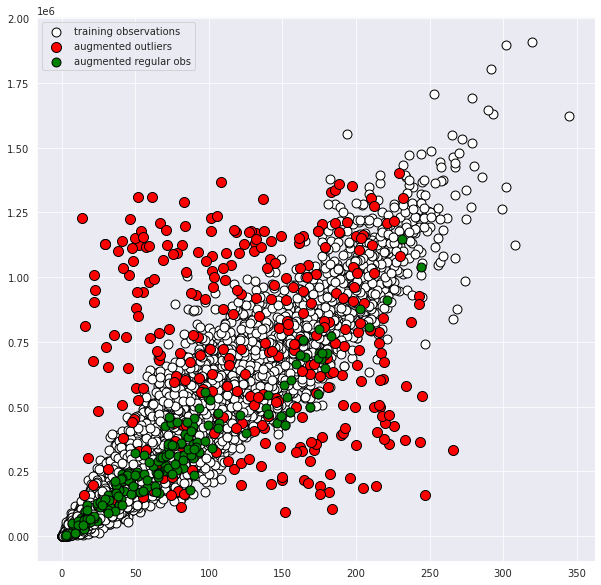

In [23]:
atm_abnormal_cut = atm_abnormal_
plt.rcParams['figure.figsize'] = [10, 10]
p1 = plt.scatter(full_atm.x1, full_atm.x2, c='white',
                 s=20*4, edgecolor='k', label="training observations")
p2 = plt.scatter(atm_abnormal_cut.loc[atm_abnormal_y_.y == -1, ['x1']], 
                 atm_abnormal_cut.loc[atm_abnormal_y_.y == -1, ['x2']], 
                 c='red', s=20*5, edgecolor='k', label="augmented outliers")
p3 = plt.scatter(atm_abnormal_cut.loc[atm_abnormal_y_.y == 1, ['x1']], 
                 atm_abnormal_cut.loc[atm_abnormal_y_.y == 1, ['x2']], 
                 c='green', s=20*4, edgecolor='k', label="augmented regular obs")
plt.legend()
plt.savefig(PATH+'/ATM.png')


LOF : 이상치 데이터셋에서 정확도: 61.8


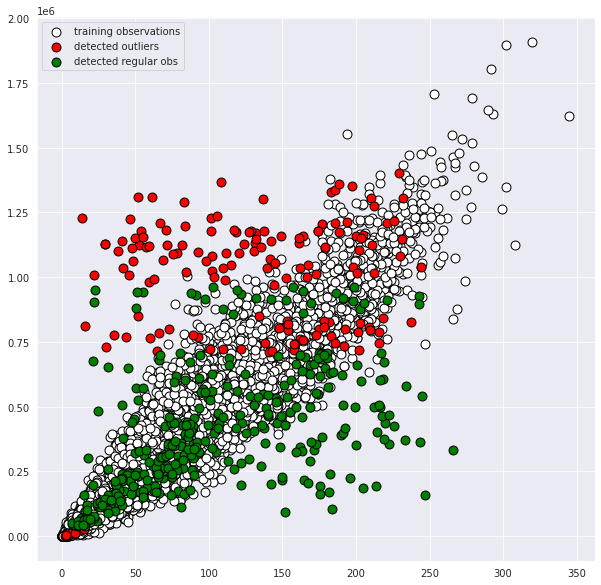

In [24]:
# LOF
atm_abnormal_cut=atm_abnormal_
acc = 0
from sklearn.neighbors import LocalOutlierFactor
X_inliers = full_atm.to_numpy()
X_outliers = atm_abnormal_cut.to_numpy()

clf = LocalOutlierFactor(n_neighbors=500, contamination=0.1)
X = np.r_[X_inliers, X_outliers]
n_outliers = len(X_outliers)
ground_truth = np.ones(len(X), dtype=int)
ground_truth[-n_outliers:] = -1
y_pred = clf.fit_predict(X)
y_pred_outliers = y_pred[len(full_atm):]

atm_abnormal_cut = atm_abnormal_cut.assign(y = y_pred_outliers)

p1 = plt.scatter(full_atm.x1, full_atm.x2, c='white',
                 s=20*4, edgecolor='k', label="training observations")
p2 = plt.scatter(atm_abnormal_cut.loc[atm_abnormal_cut.y == -1, ['x1']], 
                 atm_abnormal_cut.loc[atm_abnormal_cut.y == -1, ['x2']], 
                 c='red', s=20*4, edgecolor='k', label="detected outliers")
p3 = plt.scatter(atm_abnormal_cut.loc[atm_abnormal_cut.y == 1, ['x1']], 
                 atm_abnormal_cut.loc[atm_abnormal_cut.y == 1, ['x2']], 
                 c='green', s=20*4, edgecolor='k', label="detected regular obs")
plt.legend()

for i in range(500):
    if(y_pred_outliers[i]==atm_abnormal_y_.to_numpy()[i]):
        acc +=1
accuracy = (acc/500) *100
plt.savefig(PATH+'/LOF_Pred_{:.4f}.png'.format(accuracy))
print("LOF : 이상치 데이터셋에서 정확도:", accuracy)

IsolationForest : 이상치 데이터셋에서 정확도: 81.0


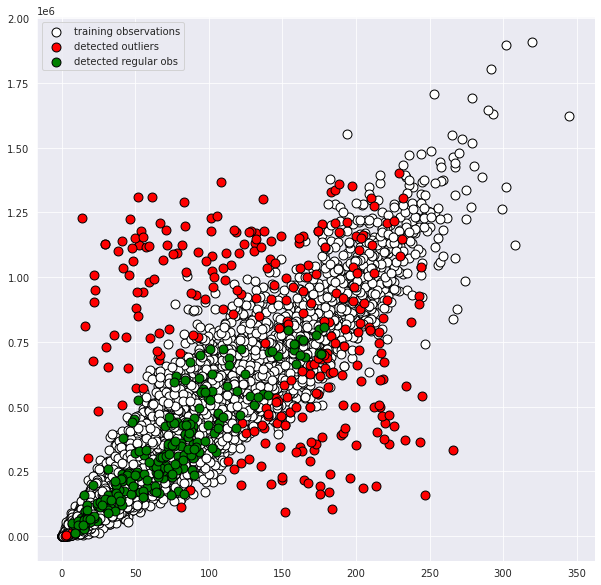

In [25]:
# Isolation Forest
atm_abnormal_cut=atm_abnormal_
acc =0
clf = IsolationForest(max_samples=600, contamination = 0.1, random_state=112)
clf.fit(full_atm)
y_pred_train = clf.predict(full_atm)
# y_pred_test = clf.predict(atm_test)
y_pred_outliers = clf.predict(atm_abnormal_cut)
atm_abnormal_cut = atm_abnormal_cut.assign(y = y_pred_outliers)
p1 = plt.scatter(full_atm.x1, full_atm.x2, c='white',
                 s=20*4, edgecolor='k', label="training observations")
p2 = plt.scatter(atm_abnormal_cut.loc[atm_abnormal_cut.y == -1, ['x1']], 
                 atm_abnormal_cut.loc[atm_abnormal_cut.y == -1, ['x2']], 
                 c='red', s=20*4, edgecolor='k', label="detected outliers")
p3 = plt.scatter(atm_abnormal_cut.loc[atm_abnormal_cut.y == 1, ['x1']], 
                 atm_abnormal_cut.loc[atm_abnormal_cut.y == 1, ['x2']], 
                 c='green', s=20*4, edgecolor='k', label="detected regular obs")
plt.legend()
for i in range(500):
    if(y_pred_outliers[i]==atm_abnormal_y_.to_numpy()[i]):
        acc +=1
accuracy = (acc/500) *100
plt.savefig(PATH+'/IsolationForest_Pred_{:.4f}.png'.format(accuracy))
print("IsolationForest : 이상치 데이터셋에서 정확도:", accuracy)

In [24]:
# For Anomaly Transformer

np.save("/home/bigdyl/Anomaly-Transformer/dataset/ATM/ATM_test_label.npy",atm_abnormal_y2_)
anomaly_transformer_result = np.load("/home/bigdyl/Anomaly-Transformer/anomaly_transormer_ATM_result.npy")
atm_abnormal_y_np = atm_abnormal_y_.to_numpy()
np.save("/home/bigdyl/Anomaly-Transformer/atm_test_label.npy",atm_abnormal_y_np)
atm_abnormal_y_result =pd.DataFrame()
atm_abnormal_y_result['y'] = anomaly_transformer_result


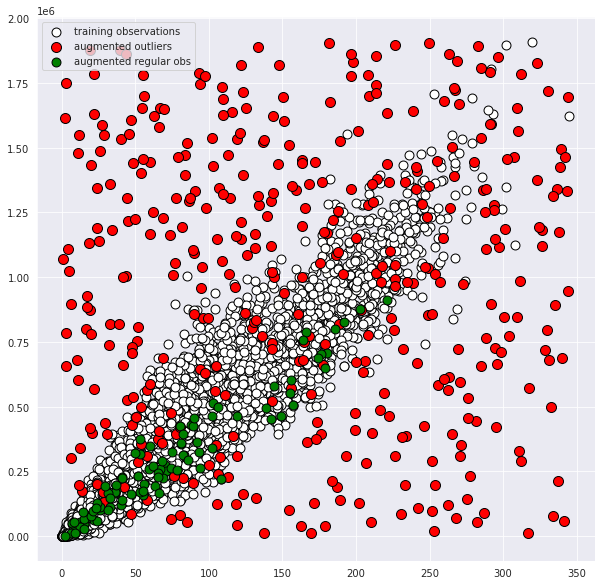

In [52]:
atm_abnormal_cut = atm_abnormal_
plt.rcParams['figure.figsize'] = [10, 10]
p1 = plt.scatter(full_atm.x1, full_atm.x2, c='white',
                 s=20*4, edgecolor='k', label="training observations")
p2 = plt.scatter(atm_abnormal_cut.loc[atm_abnormal_y_result.y == 0, ['x1']], 
                 atm_abnormal_cut.loc[atm_abnormal_y_result.y == 0, ['x2']], 
                 c='red', s=20*5, edgecolor='k', label="augmented outliers")
p3 = plt.scatter(atm_abnormal_cut.loc[atm_abnormal_y_result.y == 1, ['x1']], 
                 atm_abnormal_cut.loc[atm_abnormal_y_result.y == 1, ['x2']], 
                 c='green', s=20*4, edgecolor='k', label="augmented regular obs")
# plt.xlim(full_transfer["x1"].min()-1e7,2.5e8)
plt.legend()
plt.savefig(PATH+'/Anomaly_Transformer_ATM.png')
